In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('A2Z insurance.csv')

In [3]:
def FirstLook(df):
    
    """Given a dataFrame the function prints the best insights."""
    
    print("First 5 rows of the dataFrame: \n\n", df.head())
    print("Shape: \n\n", df.shape)
    print("Columns names: \n\n", df.columns)
    print("Columns types: \n\n", df.dtypes)
    print("Description: \n\n", df.describe())    

In [4]:
FirstLook(df)

First 5 rows of the dataFrame: 

    Customer Identity  First Policy´s Year  Brithday Year Educational Degree  \
0                  1               1985.0         1982.0    2 - High School   
1                  2               1981.0         1995.0    2 - High School   
2                  3               1991.0         1970.0          1 - Basic   
3                  4               1990.0         1981.0        3 - BSc/MSc   
4                  5               1986.0         1973.0        3 - BSc/MSc   

   Gross Monthly Salary  Geographic Living Area  Has Children (Y=1)  \
0                2177.0                     1.0                 1.0   
1                 677.0                     4.0                 1.0   
2                2277.0                     3.0                 0.0   
3                1099.0                     4.0                 1.0   
4                1763.0                     4.0                 1.0   

   Customer Monetary Value  Claims Rate  Premiums in LOB: Motor 

In [5]:
def central_tendency(df, columns, central_tendency = "Mean", grouped = False, group = None):
    """
    Replaces the null values in the selected columns of a DataFrame with the central tendency of the column, with or without
    grouping by first.
    
    Input variables:
    -df - a Pandas DataFrame
    -columns - a list of strings with the name of the columns that we want to replace null values in
    -central_tendency - a string specifying the central tendency that we want to replace the null values with. Can only take
    the values "Mean", "Median", and "Mode" (default: "Mean")
    -grouped - a boolean variable that says whether we are grouping instances or not (default: False)
    -group - a list of strings with the name of the columns that we want to group our data by (default: None)
    """
    
    df_grouped = df.copy()
    
    if grouped == True:
        df_grouped = df_grouped.groupby(group)
    
    if central_tendency == "Mean":
        c_tendency = df_grouped[column].mean()
    elif central_tendency == "Median":
        c_tendency = df_grouped[column].median()
    else:
        c_tendency = df_grouped[column].mode()
        
    for column in columns:
        df[column] = df[column].fillna(c_tendency)
            
    return df

In [6]:
from sklearn.neighbors import NearestNeighbors

def nearest_neighbor(df, line, columns):
    """ we need to find a criteria for the nearest neighbor"""
    df_line = df[line].drop(columns,1)
    df_neighbor = df.dropna()
    df_neighbor = df_neighbor.drop(columns,1)
    
    neigh = NearestNeighbors(n_neighbors=1)
    neigh.fit(df_neighbors)
    
    return(neigh.kneighbors(df_line))

In [7]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm

data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]])), missing = 'drop').fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included])), missing = 'drop').fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
            
        # save the last model
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included])), missing = 'drop').fit()
    
    return model.params

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

C:\Users\Mafalda\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Add  LSTAT                          with p-value 5.0811e-88
Add  RM                             with p-value 3.47226e-27
Add  PTRATIO                        with p-value 1.64466e-14
Add  DIS                            with p-value 1.66847e-05
Add  NOX                            with p-value 5.48815e-08
Add  CHAS                           with p-value 0.000265473
Add  B                              with p-value 0.000771946
Add  ZN                             with p-value 0.00465162
resulting features:
const      30.316950
LSTAT      -0.543125
RM          4.116082
PTRATIO    -0.881851
DIS        -1.382714
NOX       -16.687428
CHAS        3.111062
B           0.009404
ZN          0.037808
dtype: float64


In [8]:
def regression(df, target):
    X = df.drop([target, 'Educational Degree'],1)
    y = df[target]
    
    result = stepwise_selection(X, y)
    
    for line in df[target].index:
        if df[target].isna()[line] == True:
            replace = 0
            
            for i in result.index:
                if i == 'const':
                    replace += result[i]
                elif df[i].isna()[line] == True:
                    pass
                else:
                    replace += result[i] * df.loc[line, i]
            
            df.loc[line, target] = replace
    
    return df

In [9]:
regression(df, 'Brithday Year')

C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Add  Has Children (Y=1)             with p-value 0.0
Add  Gross Monthly Salary           with p-value 0.0
Add  Premiums in LOB:  Life         with p-value 2.38082e-94
Add  Premiums in LOB: Work Compensations with p-value 3.45486e-34
Add  Premiums in LOB: Motor         with p-value 2.15471e-10
Add  Premiums in LOB: Household     with p-value 3.37989e-07


,Customer Identity,First Policy´s Year,Brithday Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
0,1,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4,1990.0,1981.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5,1986.0,1973.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
5,6,1986.0,1956.0,2 - High School,2566.0,4.0,1.0,-24.33,1.00,440.75,18.90,114.80,7.00,7.67
6,7,1979.0,1943.0,2 - High School,4103.0,4.0,0.0,-66.01,1.05,156.92,295.60,317.95,14.67,26.34
7,8,1988.0,1974.0,2 - High School,1743.0,4.0,1.0,-144.91,1.13,248.27,397.30,144.36,66.68,53.23
8,9,1981.0,1978.0,3 - BSc/MSc,1862.0,1.0,1.0,356.53,0.36,344.51,18.35,210.04,8.78,9.89
9,10,1976.0,1948.0,3 - BSc/MSc,3842.0,1.0,0.0,-119.35,1.12,209.26,182.25,271.94,39.23,55.12


In [10]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        #print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    #print("Best fitting distribution: "+str(best_dist))
    #print("Best p value: "+ str(best_p))
    #print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [11]:
for column in df.drop(['Customer Identity', 'Educational Degree'], 1).columns:
    print(column, get_best_distribution(df[column].dropna()))

C:\Users\Mafalda\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


First Policy´s Year ('genextreme', 1.2911632271037977e-90, (-0.04320626203558489, 1982.6043260296626, 6.033163772175293))


C:\Users\Mafalda\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1469: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


Brithday Year ('norm', 8.354978464862701e-26, (1968.0060903492767, 19.699789966997137))
Gross Monthly Salary ('norm', 6.573173045578768e-17, (2506.6670565302143, 1157.3932268448382))


C:\Users\Mafalda\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2365: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)


Geographic Living Area ('norm', 0.0, (2.7098591549295774, 1.266229245731769))
Has Children (Y=1) ('norm', 0.0, (0.7067639902676399, 0.45524570544773213))
Customer Monetary Value ('norm', 0.0, (177.8926048951049, 1945.7170092958143))
Claims Rate ('genextreme', 1.1925240012222786e-119, (-0.06549838322835644, 0.5108366087052438, 0.31015968516576164))
Premiums in LOB: Motor ('norm', 1.750341217423456e-107, (300.4702523874488, 211.90467150995468))
Premiums in LOB: Household ('exponweib', 0.0018907797293061118, (20.146128268924365, 0.48587850675533895, -108.62244991067769, 20.036502300445193))
Premiums in LOB: Health ('genextreme', 2.504355660668771e-15, (-0.03297277864635334, 131.09520695040706, 65.73766695412586))
Premiums in LOB:  Life ('exponweib', 6.082255186216593e-09, (5.163672497929298, 0.5707964391394, -8.560524169249474, 9.890219517670591))
Premiums in LOB: Work Compensations ('exponweib', 7.876805187029856e-05, (19.427887828241158, 0.4699442133154901, -17.520539704396892, 3.404819

In [47]:
import matplotlib.pyplot as plt

def show_plots(df):
    df = df.drop(['Customer Identity', 'Educational Degree'], 1)
    for column in df.columns:
        plt.scatter(df[column], [1] * df[column].size)
        plt.xlabel(column)
        plt.show()

def show_pairs(df):
    df = df.drop(['Customer Identity', 'Educational Degree'], 1)
    
    for column1 in df.columns:
        for column2 in df.loc[:,column1:].columns:
            if column1 != column2:
                plt.scatter(df[column1], df[column2])
                plt.xlabel(column1)
                plt.ylabel(column2)
                plt.show()

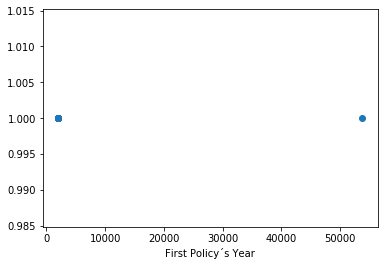

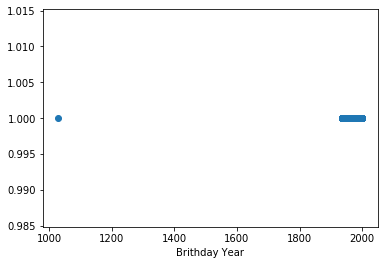

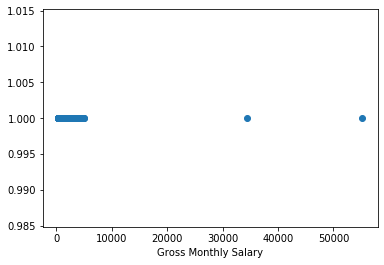

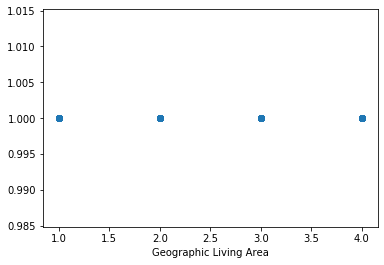

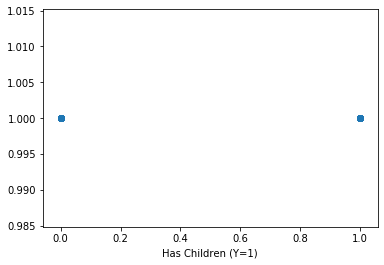

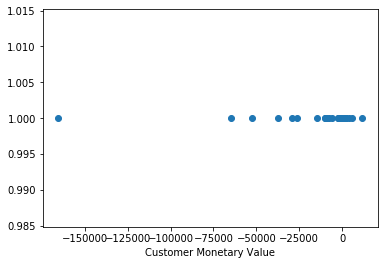

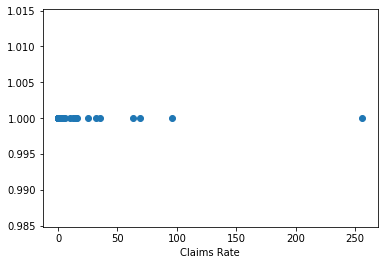

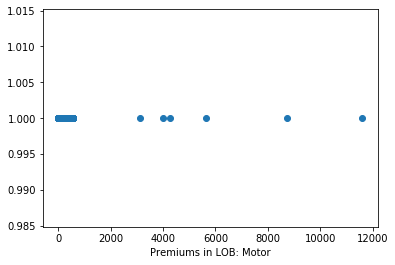

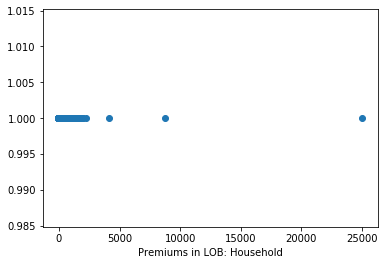

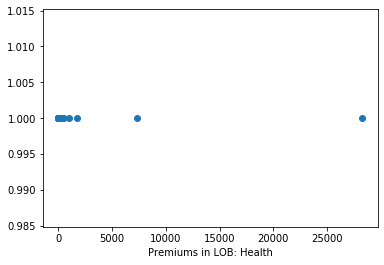

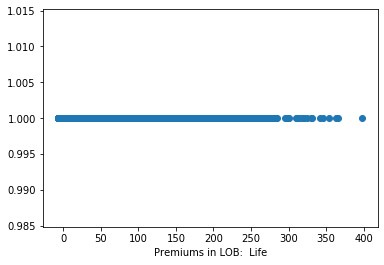

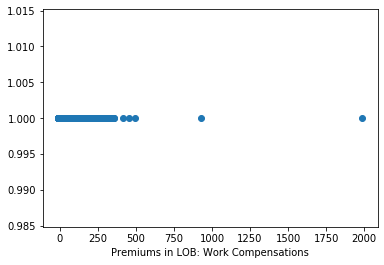

In [29]:
show_plots(df)

In [39]:
df['First Policy´s Year'] = df['First Policy´s Year'].loc[df['First Policy´s Year']<10000]
df['Brithday Year'] = df['Brithday Year'].loc[df['Brithday Year']>1800]
df['Gross Monthly Salary'] = df['Gross Monthly Salary'].loc[df['Gross Monthly Salary']<10000]
df['Customer Monetary Value'] = df['Customer Monetary Value'].loc[df['Customer Monetary Value']>-75000]
df['Claims Rate'] = df['Claims Rate'].loc[df['Claims Rate']<150]
df['Premiums in LOB: Motor'] = df['Premiums in LOB: Motor'].loc[df['Premiums in LOB: Motor'] < 2000]
df['Premiums in LOB: Household'] = df['Premiums in LOB: Household'].loc[df['Premiums in LOB: Household']<2500]
df['Premiums in LOB: Health'] = df['Premiums in LOB: Health'].loc[df['Premiums in LOB: Health']<500]
df['Premiums in LOB:  Life'] = df['Premiums in LOB:  Life'].loc[df['Premiums in LOB:  Life']<375]
df['Premiums in LOB: Work Compensations'] = df['Premiums in LOB: Work Compensations'].loc[df['Premiums in LOB: Work Compensations']<750]

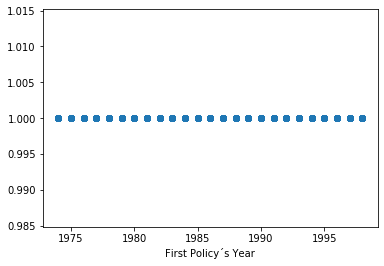

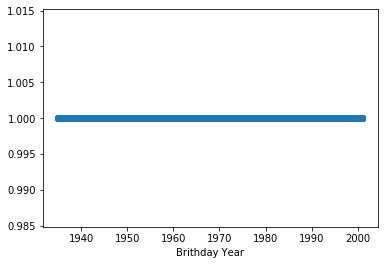

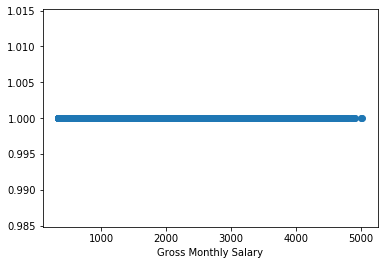

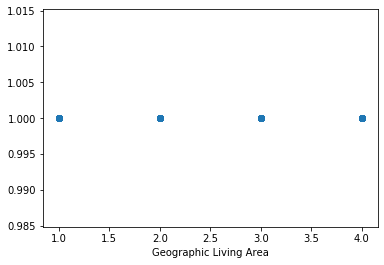

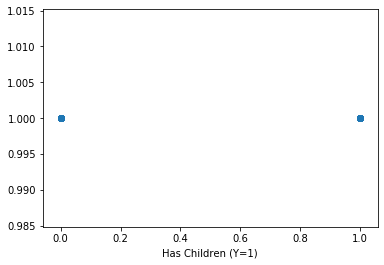

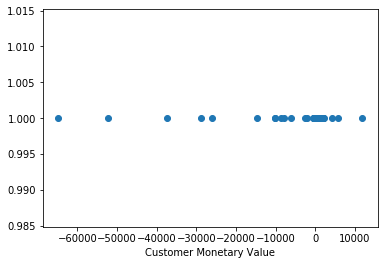

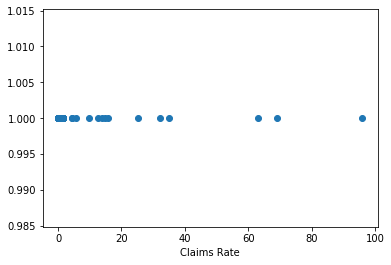

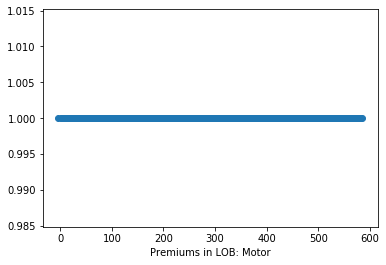

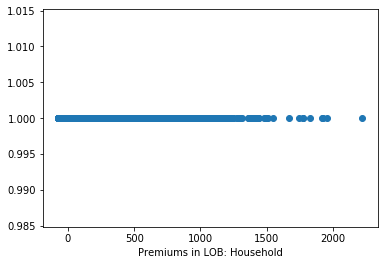

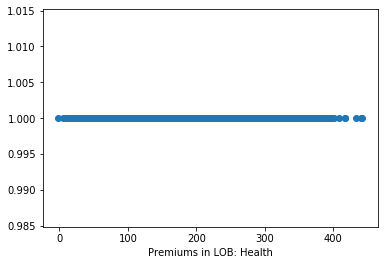

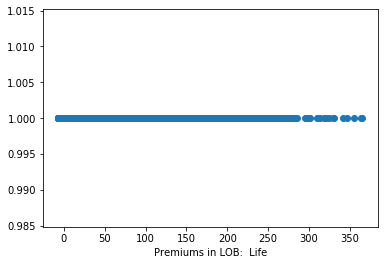

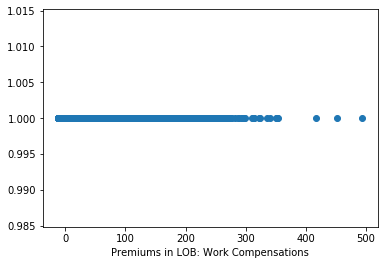

In [40]:
show_plots(df)

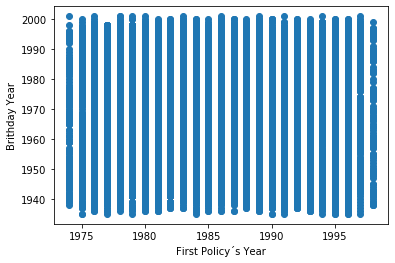

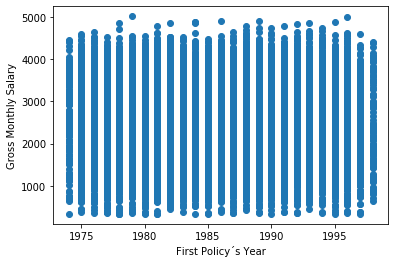

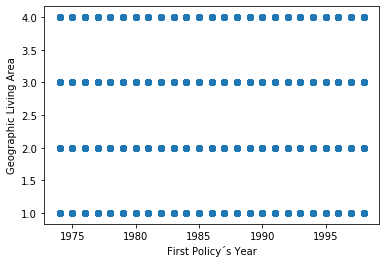

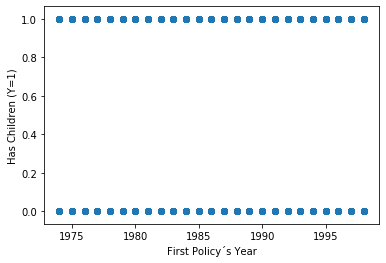

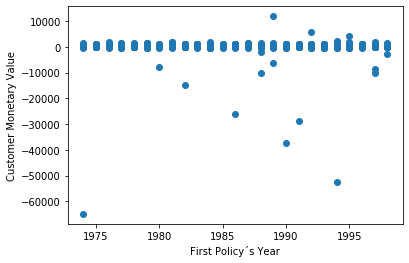

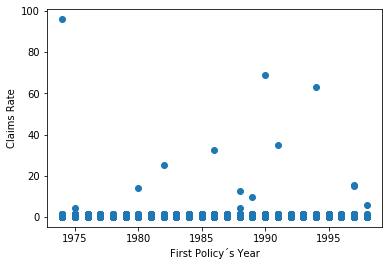

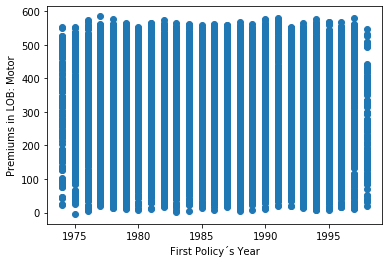

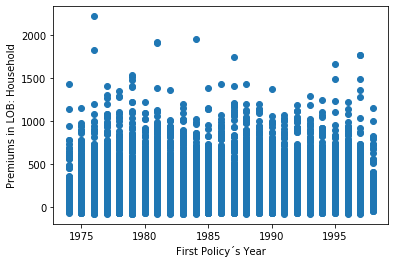

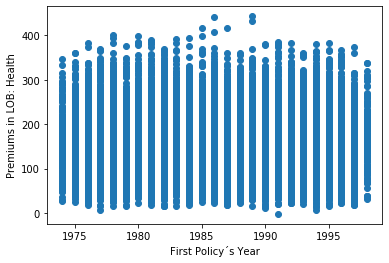

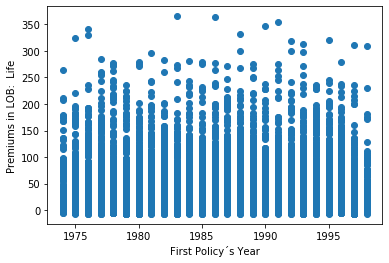

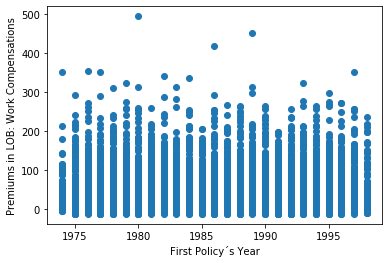

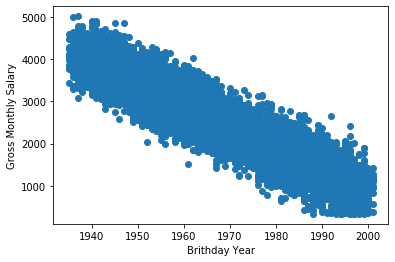

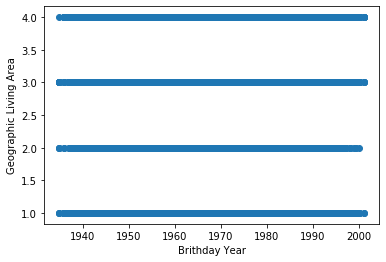

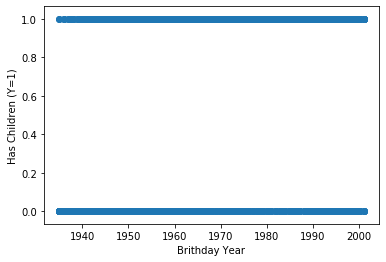

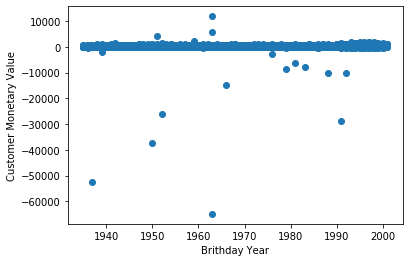

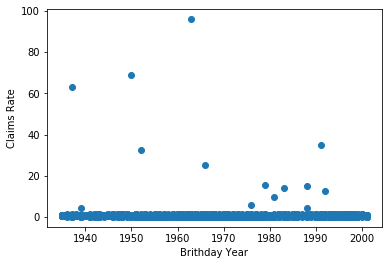

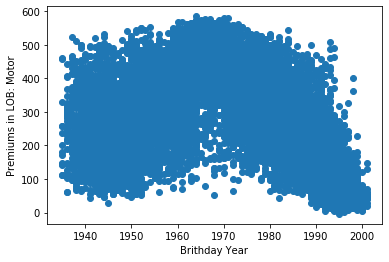

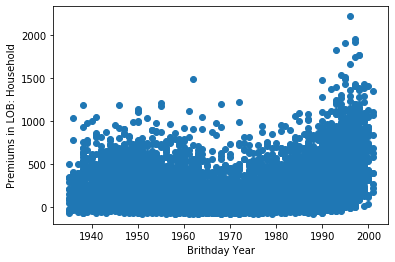

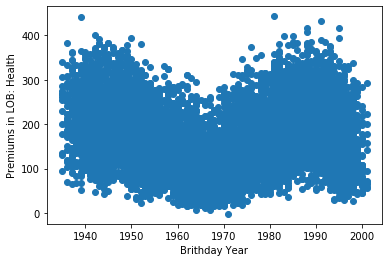

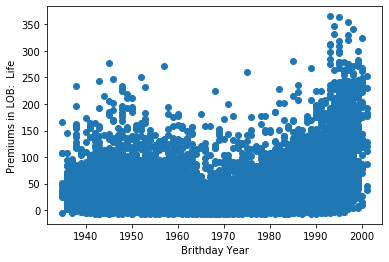

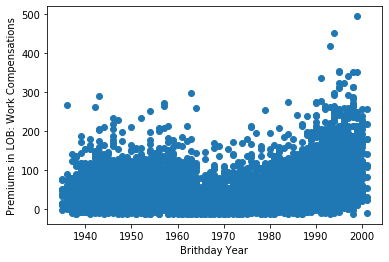

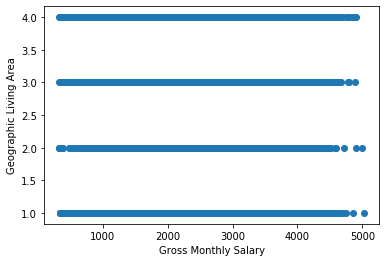

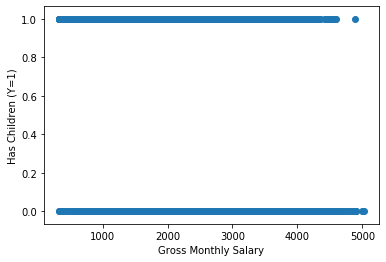

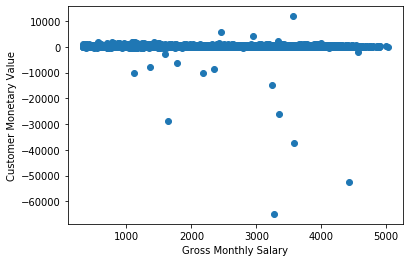

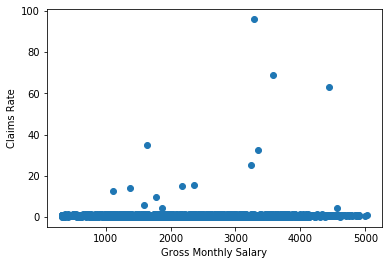

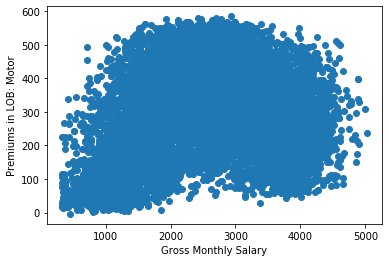

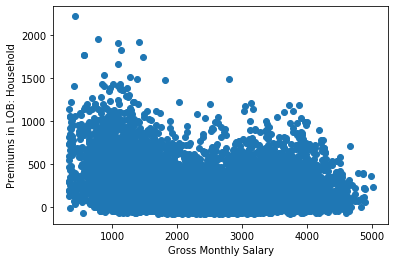

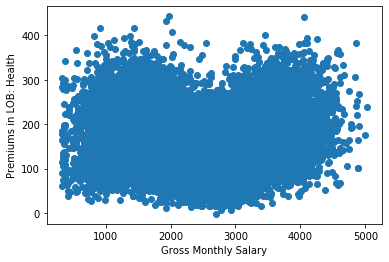

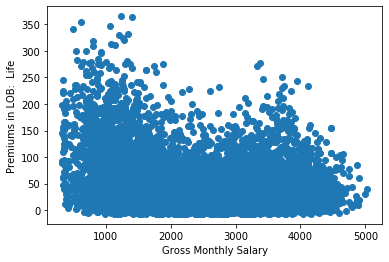

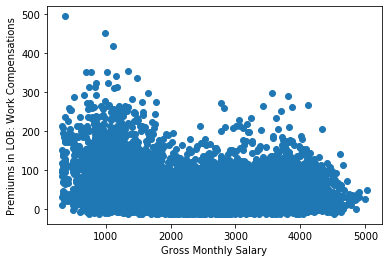

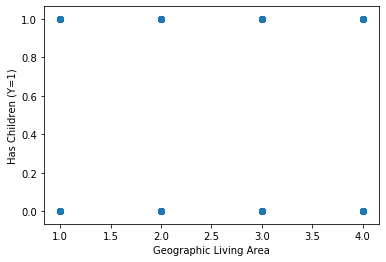

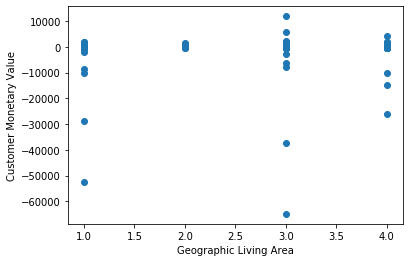

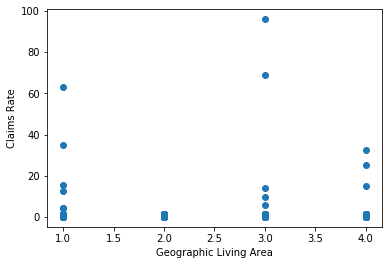

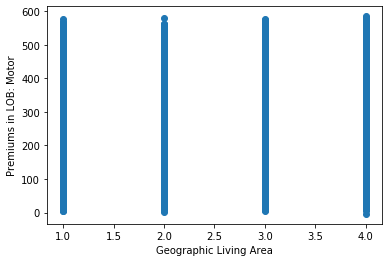

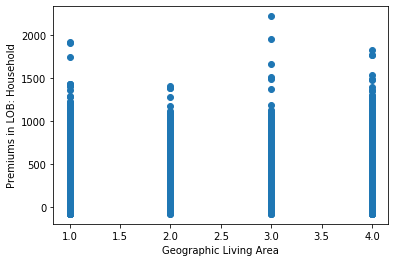

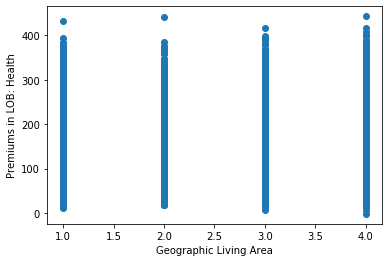

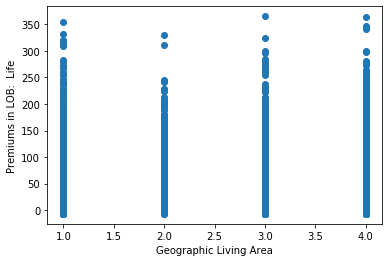

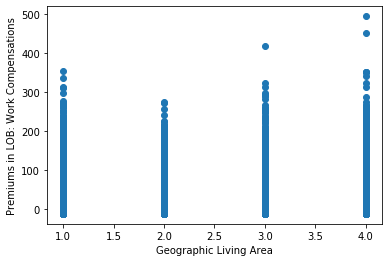

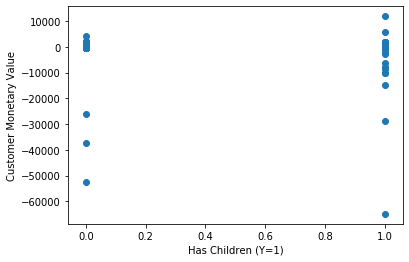

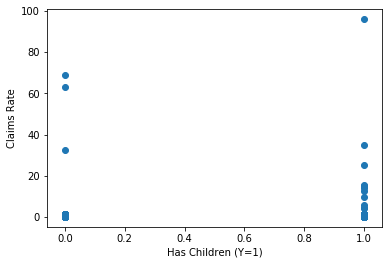

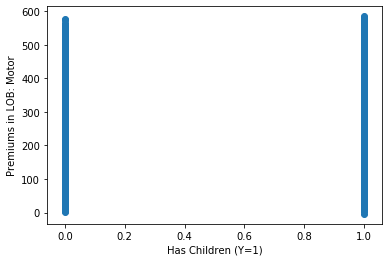

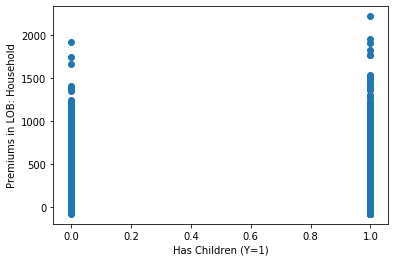

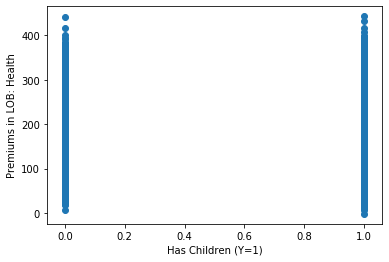

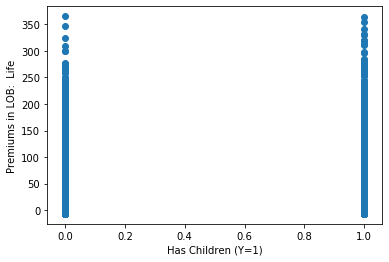

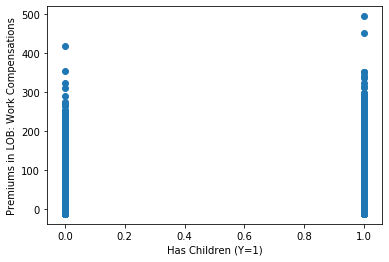

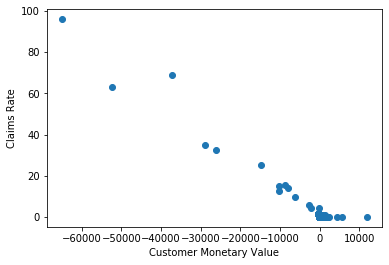

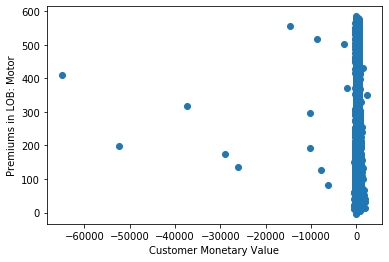

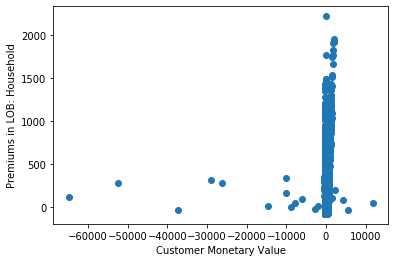

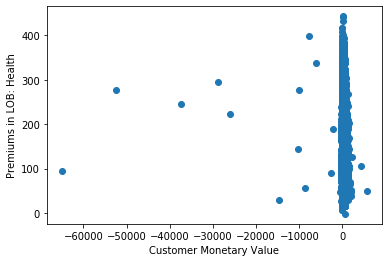

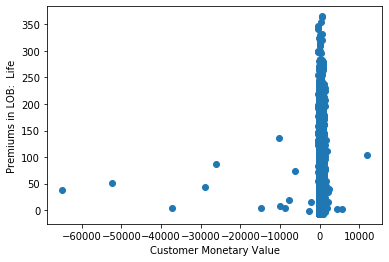

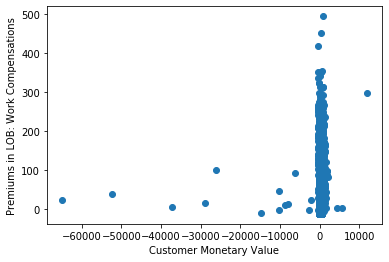

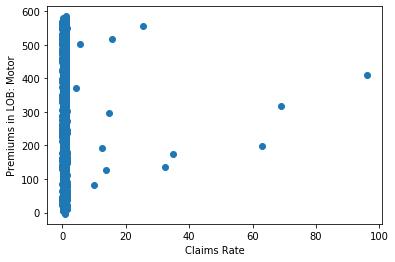

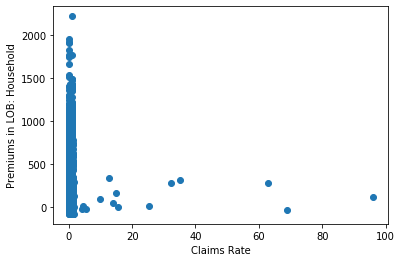

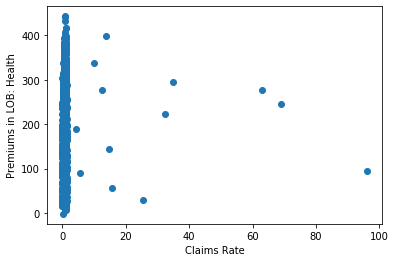

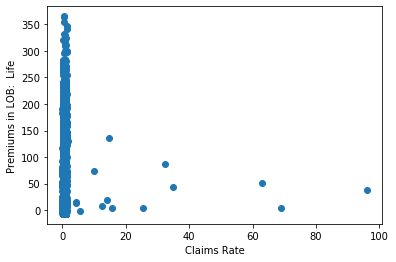

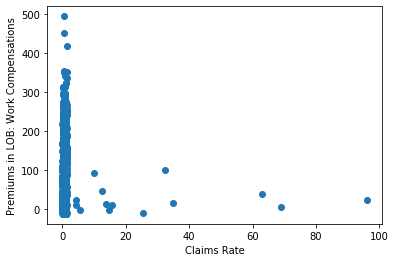

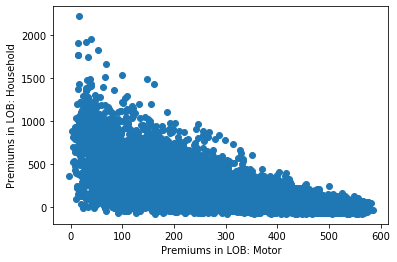

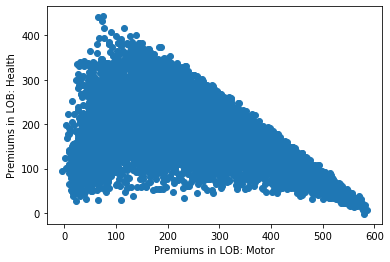

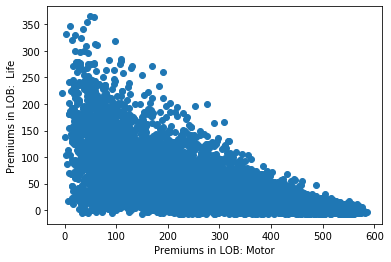

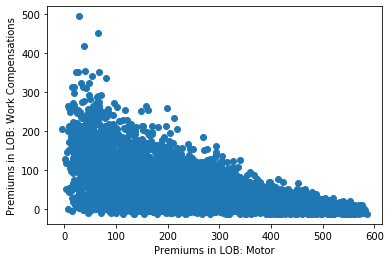

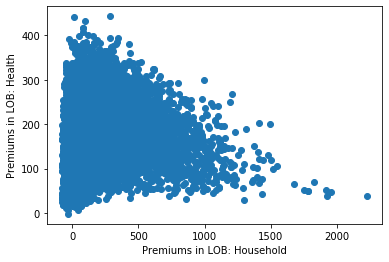

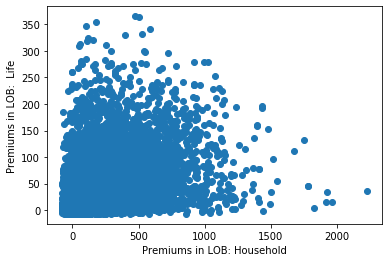

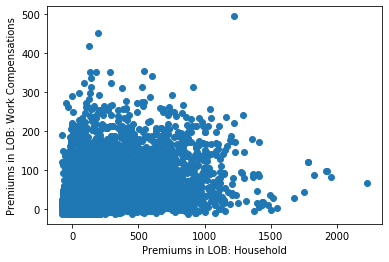

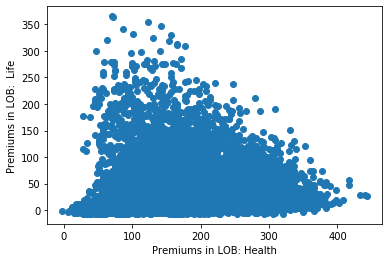

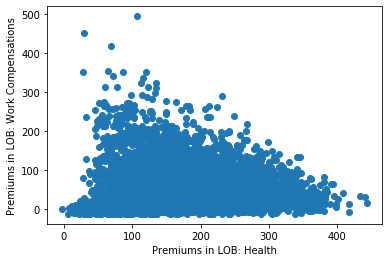

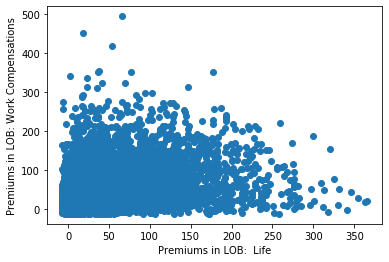

In [48]:
show_pairs(df)